In [24]:
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# res = requests.get('https://data.lacity.org/resource/2nrs-mtv8.csv?$query=SELECT%0A%20%20%60dr_no%60%2C%0A%20%20%60date_rptd%60%2C%0A%20%20%60date_occ%60%2C%0A%20%20%60time_occ%60%2C%0A%20%20%60area%60%2C%0A%20%20%60area_name%60%2C%0A%20%20%60rpt_dist_no%60%2C%0A%20%20%60part_1_2%60%2C%0A%20%20%60crm_cd%60%2C%0A%20%20%60crm_cd_desc%60%2C%0A%20%20%60mocodes%60%2C%0A%20%20%60vict_age%60%2C%0A%20%20%60vict_sex%60%2C%0A%20%20%60vict_descent%60%2C%0A%20%20%60premis_cd%60%2C%0A%20%20%60premis_desc%60%2C%0A%20%20%60weapon_used_cd%60%2C%0A%20%20%60weapon_desc%60%2C%0A%20%20%60status%60%2C%0A%20%20%60status_desc%60%2C%0A%20%20%60crm_cd_1%60%2C%0A%20%20%60crm_cd_2%60%2C%0A%20%20%60crm_cd_3%60%2C%0A%20%20%60crm_cd_4%60%2C%0A%20%20%60location%60%2C%0A%20%20%60cross_street%60%2C%0A%20%20%60lat%60%2C%0A%20%20%60lon%60')
# crimes = pd.read_csv(res.url)


crimes = pd.read_csv('data/crimes.csv')


print(f"Total number of crimes: {len(crimes)}")

Total number of crimes: 400146


In [40]:
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,year
0,201223780,2020-11-02,11/02/2020 12:00:00 AM,1120,12,77th Street,1256,210,ROBBERY,65,...,Invest Cont,210.0,NaN,NaN,NaN,73RD ST,FIGUEROA ST,33.9737,-118.2827,2020
1,201911283,2020-06-23,06/23/2020 12:00:00 AM,315,19,Mission,1958,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",51,...,Invest Cont,740.0,998.0,NaN,NaN,9700 WOODMAN AV,NaN,34.2467,-118.4479,2020
2,200806654,2020-02-28,02/28/2020 12:00:00 AM,1545,8,West LA,885,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),38,...,Invest Cont,420.0,NaN,NaN,NaN,10400 W PICO BL,NaN,34.0463,-118.4171,2020
3,220912167,2022-08-03,07/26/2022 12:00:00 AM,1730,9,Van Nuys,955,901,VIOLATION OF RESTRAINING ORDER,64,...,Adult Other,901.0,NaN,NaN,NaN,14200 MAGNOLIA BL,NaN,34.1668,-118.4445,2022
4,200817110,2020-12-02,11/27/2020 12:00:00 AM,1500,8,West LA,802,662,"BUNCO, GRAND THEFT",73,...,Invest Cont,662.0,NaN,NaN,NaN,15000 W SUNSET BL,NaN,34.0889,-118.5325,2020


In [38]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400146 entries, 0 to 400145
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           400146 non-null  int64         
 1   Date Rptd       400146 non-null  datetime64[ns]
 2   DATE OCC        400146 non-null  object        
 3   TIME OCC        400146 non-null  int64         
 4   AREA            400146 non-null  int64         
 5   AREA NAME       400146 non-null  object        
 6   Rpt Dist No     400146 non-null  int64         
 7   Crm Cd          400146 non-null  int64         
 8   Crm Cd Desc     400146 non-null  object        
 9   Vict Age        400146 non-null  int64         
 10  Vict Sex        346271 non-null  object        
 11  Vict Descent    346268 non-null  object        
 12  Premis Cd       400140 non-null  float64       
 13  Premis Desc     399910 non-null  object        
 14  Weapon Used Cd  136027 non-null  flo

In [42]:
crimes.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Crm Cd                 0
Crm Cd Desc            0
Vict Age               0
Vict Sex           53875
Vict Descent       53878
Premis Cd              6
Premis Desc          236
Weapon Used Cd    264119
Weapon Desc       264119
Status Desc            0
Crm Cd 1               6
Crm Cd 2          372025
Crm Cd 3          399348
Crm Cd 4          400146
LOCATION               0
Cross Street      335564
LAT                    0
LON                    0
year                   0
dtype: int64

In [43]:
crimes.fillna(method='ffill', inplace=True)

In [44]:
crimes.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Crm Cd                 0
Crm Cd Desc            0
Vict Age               0
Vict Sex               0
Vict Descent           0
Premis Cd              0
Premis Desc            0
Weapon Used Cd         0
Weapon Desc            0
Status Desc            0
Crm Cd 1               0
Crm Cd 2               1
Crm Cd 3             465
Crm Cd 4          400146
LOCATION               0
Cross Street           0
LAT                    0
LON                    0
year                   0
dtype: int64

# Listing Crime types

We are braking down all the crimes that occur in the 4 year of period.

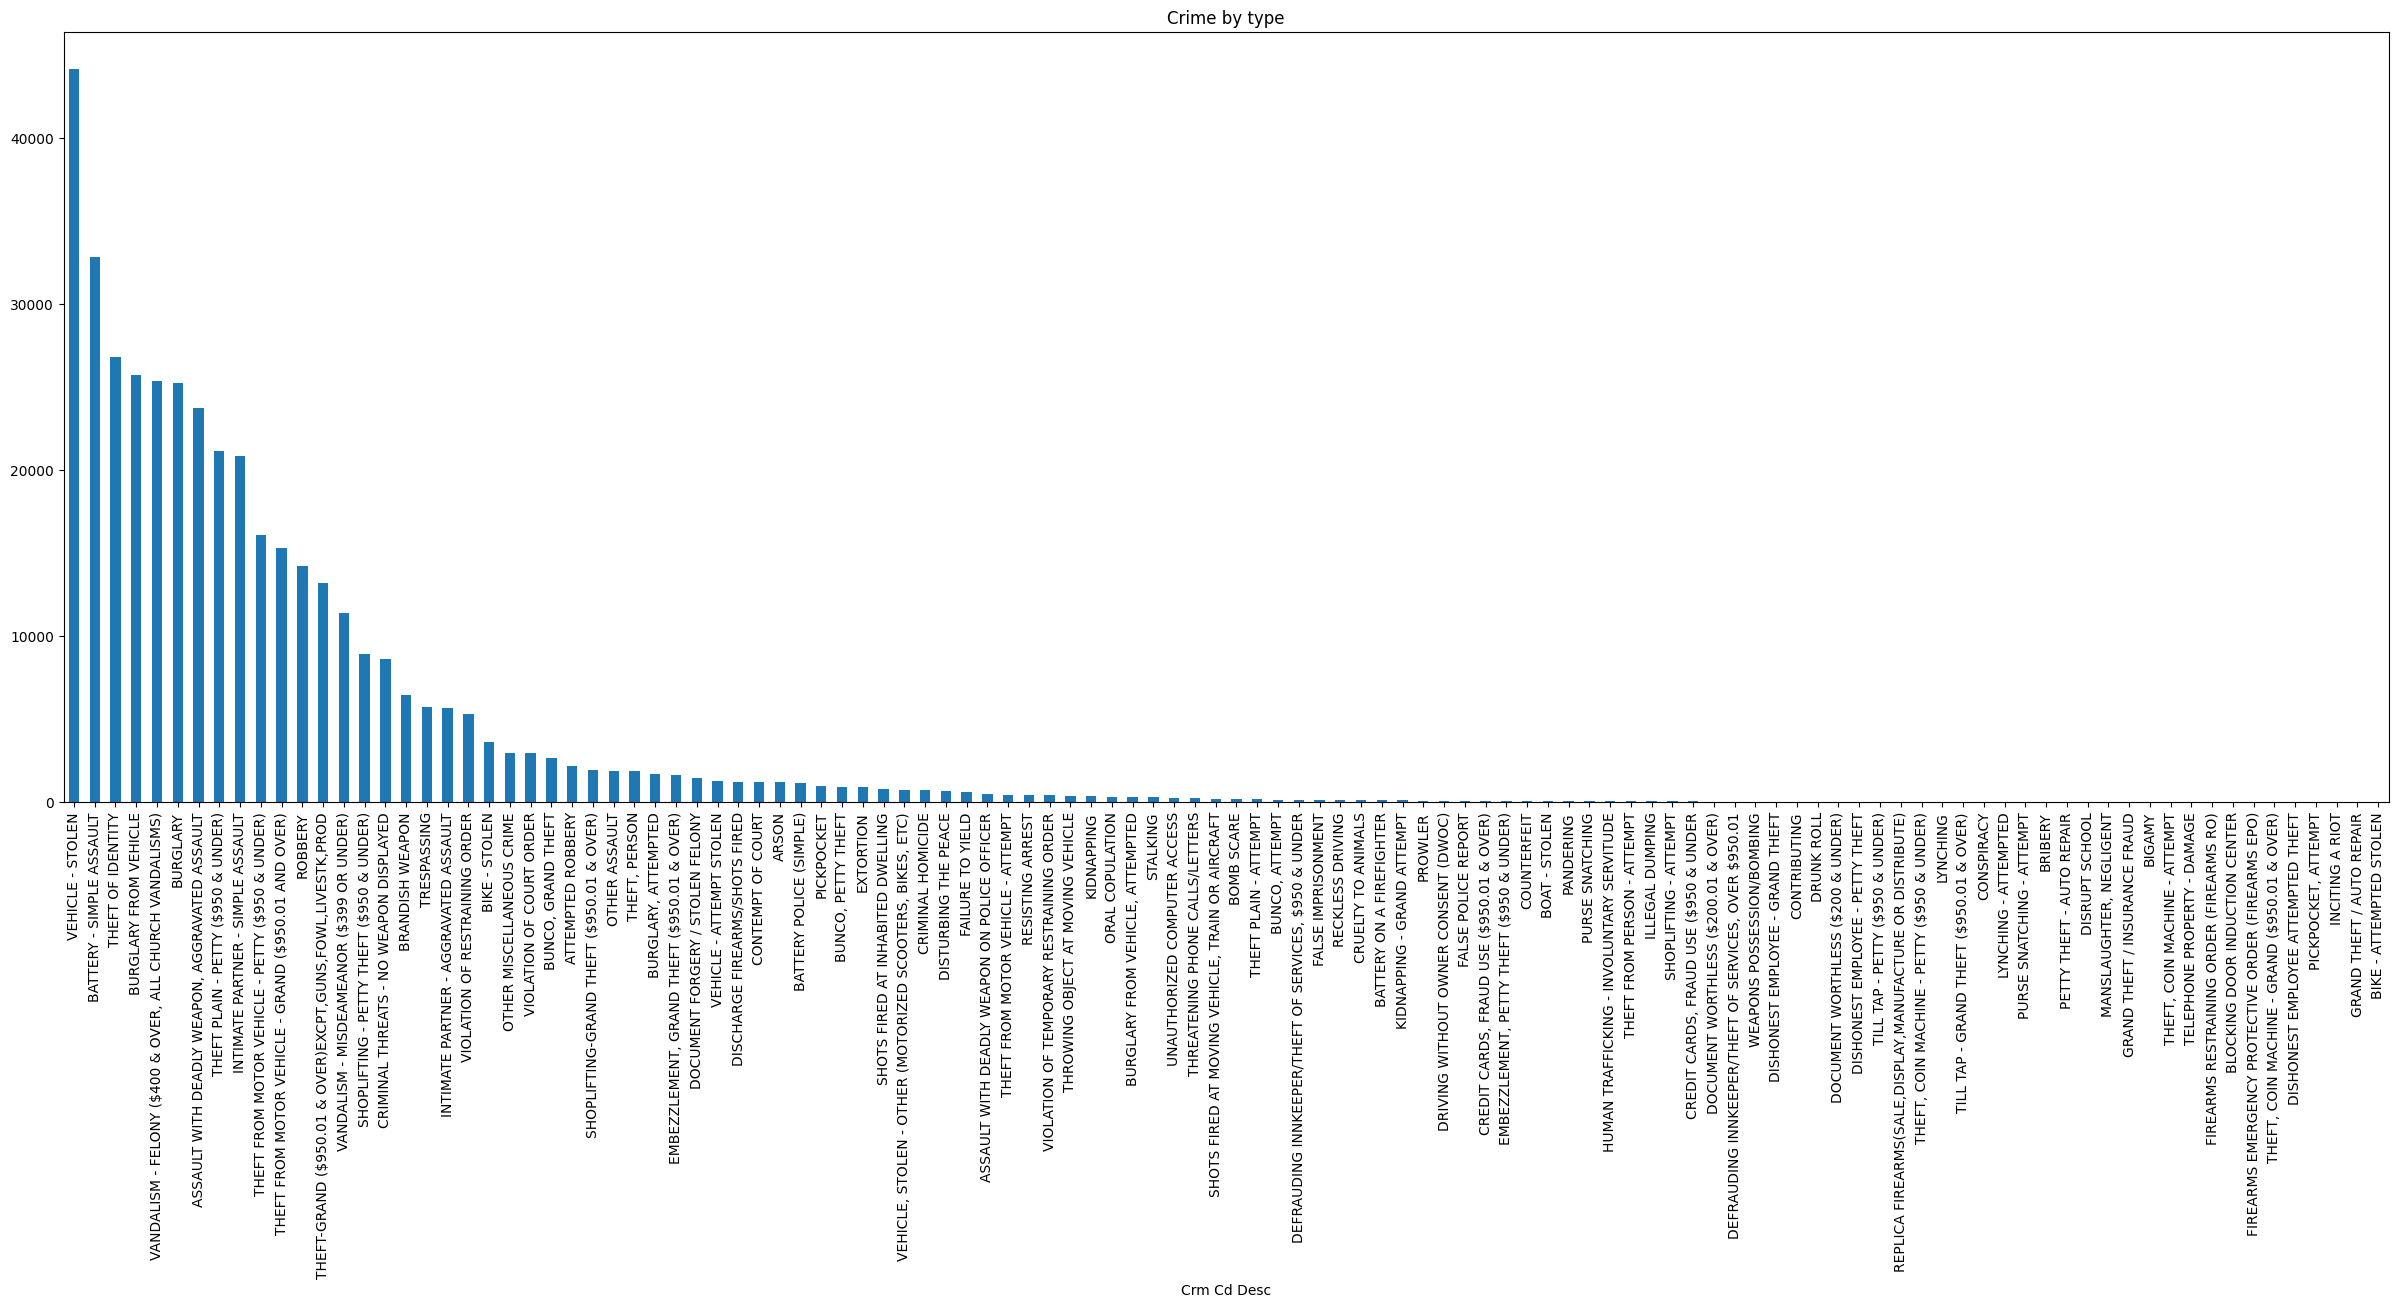

In [53]:
crimeBytype = crimes["Crm Cd Desc"].value_counts()
crimeBytype.plot(kind='bar', figsize=(30, 10))
plt.title('Crime by type')
plt.show()


We take note that vehicle-stolen, Battery and theft of identity is the most common crimes in LA.


Now, we want to graph the total number of crimes by the year

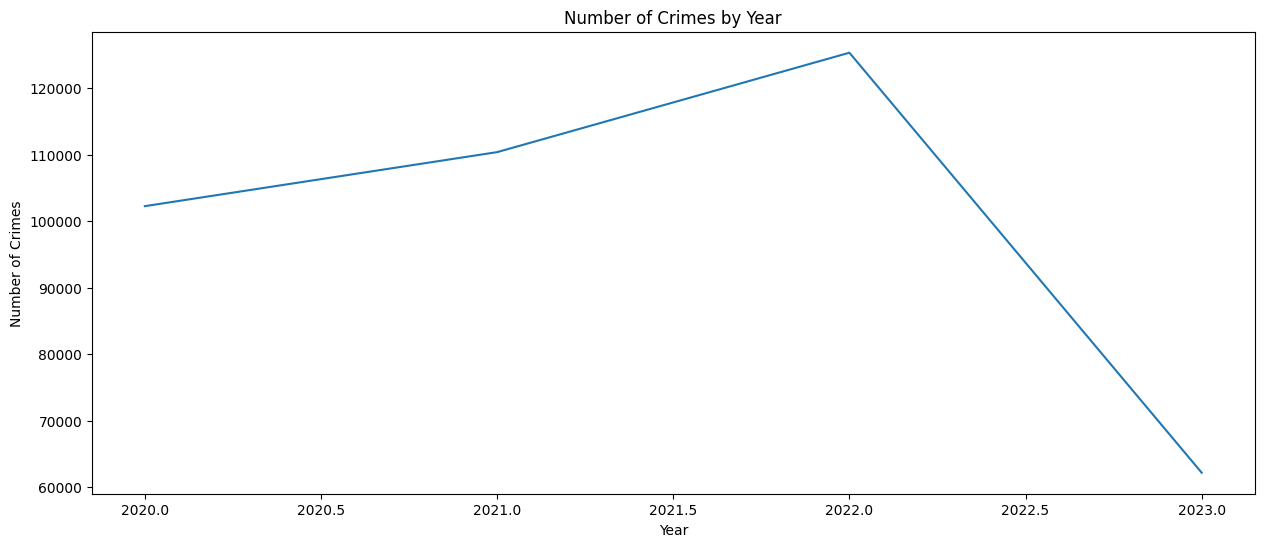

In [52]:
crimes['Date Rptd'] = pd.to_datetime(crimes['Date Rptd'])

crimes['year'] = crimes['Date Rptd'].dt.year
crimeByYear = crimes.groupby('year').size()

plt.figure(figsize=(15, 6))
sns.lineplot(data=crimeByYear)
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes by Year')
plt.show()

From the output 2022 was considered the worse year for crime.